In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.2+cu121


### 6.1. Dataset
1. <span style='color:orange;font-weight:bold'> Vision </span> -> <span style='color:green;font-weight:bold'> torchvision.datasets </span>
1. <span style='color:orange;font-weight:bold'> Text </span> -> <span style='color:green;font-weight:bold'> torchtext.datasets </span>
1. <span style='color:orange;font-weight:bold'> Audio </span> -> <span style='color:green;font-weight:bold'> torchaudio.datasets </span>
1. <span style='color:orange;font-weight:bold'> Recommendation system </span> -> <span style='color:green;font-weight:bold'> torchrec.datasets </span>
1. <span style='color:orange;font-weight:bold'> Bonus </span> -> <span style='color:green;font-weight:bold'> Torch.Data </span>

In [2]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
# Get data - Food101 dataset(Food101 starts 101 different classes of food, 1000[train:test=750:250] images/class)
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# if the image foler doesn't exist, 
if image_path.is_dir():
    print(f'{image_path}  directory already exist ...')
else:
    print(f'{image_path}  does not exist ...')
    image_path.mkdir(parents=True, exist_ok=True)

# Downloading
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    requests = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    f.write(requests.content)

# Unzip
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
    print(f'Unzipping the data')
    zip_ref.extractall(image_path)

data\pizza_steak_sushi  does not exist ...
Unzipping the data


In [4]:
# Becoming one with the data
import os
def walk_through_dir(dir_path):
    '''Walks throught dir_path returning its contents'''
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')
walk_through_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [5]:
# Setup train and tseting paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### Visualize the random image
1. get all of the image path
2. pick a random image by Python's random.choice()
3. Get the image class name using 'pathlib.Path.Parent.stem'
4. Using Python's PIL

data\pizza_steak_sushi\test\sushi\2394442.jpg
sushi
Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image hegiht 408
Image width: 512


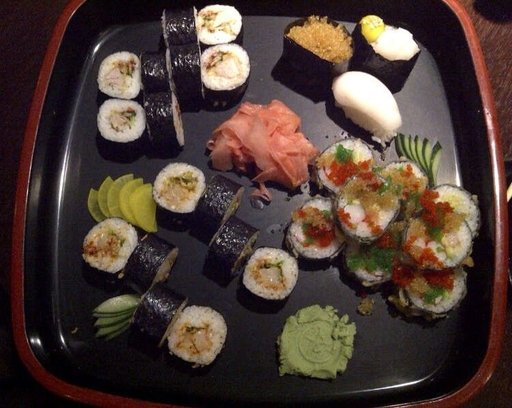

In [6]:
# Pillow
import random
from PIL import Image

random.seed(42)

# 1. Get all image path
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image hegiht {img.height}')
print(f'Image width: {img.width}')
img

Text(0.5, 1.0, 'Image class: sushi | image shape: (408, 512, 3) -> [height, width, color_channel(RGB)] (HWC)')

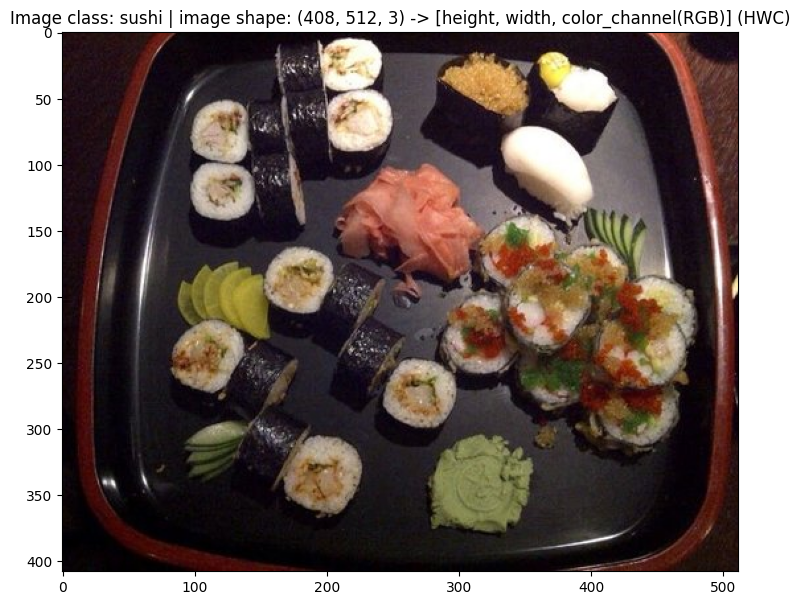

In [7]:
# matplotlib
import numpy as np
import matplotlib.pyplot as plt

# turn the image into an array
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | image shape: {img_as_array.shape} -> [height, width, color_channel(RGB)] (HWC)')

In [8]:
img_as_array

array([[[33, 13, 15],
        [30, 10, 12],
        [30, 10, 12],
        ...,
        [23, 14, 19],
        [21, 12, 17],
        [20, 11, 16]],

       [[35, 15, 17],
        [32, 12, 14],
        [31, 11, 13],
        ...,
        [21, 12, 17],
        [19, 10, 15],
        [19, 10, 15]],

       [[34, 15, 17],
        [31, 12, 14],
        [30, 11, 13],
        ...,
        [19,  9, 17],
        [18,  8, 16],
        [18,  8, 16]],

       ...,

       [[11,  6, 12],
        [11,  6, 12],
        [11,  6, 12],
        ...,
        [33, 19, 18],
        [33, 19, 19],
        [31, 17, 17]],

       [[ 8,  3,  9],
        [ 9,  4, 10],
        [ 9,  4, 10],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [27, 11, 11]],

       [[ 4,  0,  5],
        [ 5,  0,  6],
        [ 6,  1,  7],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [25,  9,  9]]], dtype=uint8)

### 6.2. Transforming data
1. turn target data into tensors
2. turn it into an 'torch.utils.data.Dataset' and 'torch.utils.data.DataLoader'
<!-- 1. <span style='color:orange;font-weight:bold'> Vision </span> -> <span style='color:green;font-weight:bold'> torchvision.datasets </span> -->

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
# Transforming data with torchvision.transform

# Write a transform for image
data_transform = transforms.Compose([
    # Resize our iamges to 64 x 64
    transforms.Resize(size=(64,64)),
    # Flip the image randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])
data_transform(img), data_transform(img).shape

(tensor([[[0.0824, 0.0824, 0.0863,  ..., 0.1412, 0.1373, 0.1294],
          [0.0902, 0.0902, 0.0902,  ..., 0.1412, 0.1373, 0.1255],
          [0.1137, 0.0980, 0.1059,  ..., 0.1333, 0.1412, 0.1294],
          ...,
          [0.1412, 0.1373, 0.1294,  ..., 0.0157, 0.0196, 0.0157],
          [0.1333, 0.1373, 0.1255,  ..., 0.0275, 0.0275, 0.0275],
          [0.1255, 0.1294, 0.1137,  ..., 0.0275, 0.0314, 0.0314]],
 
         [[0.0431, 0.0431, 0.0392,  ..., 0.0667, 0.0588, 0.0588],
          [0.0353, 0.0431, 0.0392,  ..., 0.0667, 0.0549, 0.0588],
          [0.0392, 0.0471, 0.0471,  ..., 0.0627, 0.0627, 0.0510],
          ...,
          [0.0667, 0.0667, 0.0667,  ..., 0.0078, 0.0078, 0.0039],
          [0.0667, 0.0706, 0.0706,  ..., 0.0118, 0.0118, 0.0118],
          [0.0667, 0.0667, 0.0667,  ..., 0.0196, 0.0157, 0.0118]],
 
         [[0.0745, 0.0706, 0.0706,  ..., 0.0667, 0.0667, 0.0667],
          [0.0863, 0.0902, 0.0941,  ..., 0.0863, 0.0784, 0.0784],
          [0.1137, 0.1059, 0.0941,  ...,

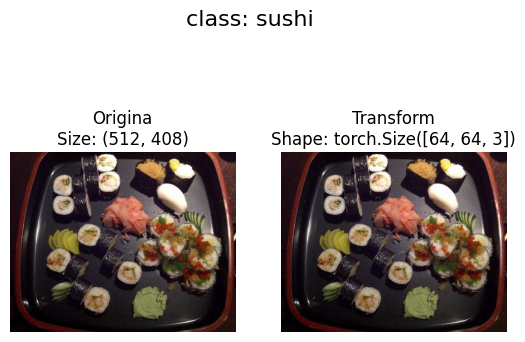

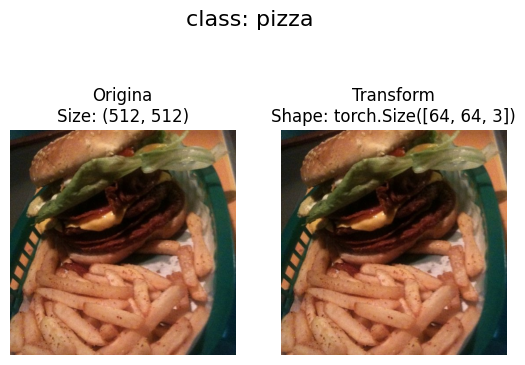

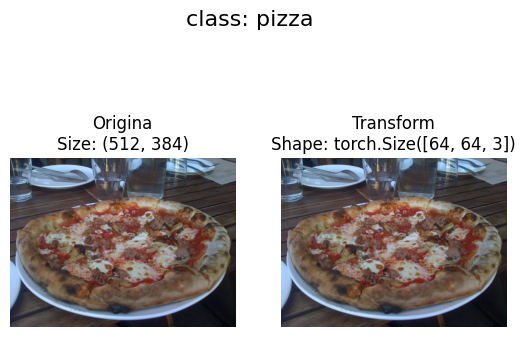

In [11]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=42):
    '''
    Selects random images from a path of images and loads/transforms
    them then plots the original vs the transformed version.
    '''
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Origina\nSize: {f.size}')
            ax[0].axis(False)
            
            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) # need to change shape for matplotlib (C,H,W) -> (H,W,C)
            ax[1].imshow(f)
            ax[1].set_title(f'Transform\nShape: {transformed_image.shape}')
            ax[1].axis('off')
            
            fig.suptitle(f'class: {image_path.parent.stem}', fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)
            

In [12]:
# Loading image data using 'torchvision.datasets.ImageFolder'
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform foro the label/target
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
# Get class name as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
# Get class name as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
# Check the lengths of dataset
len(train_data), len(test_data)

(225, 75)

In [16]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [17]:
# Index on the train_data dataset to get a single iage and label
img, label = train_data[0][0], train_data[0][1]
print(f'Image tensor:\n {img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {label}')
print(f'Label datatype: {type(label)}')

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channel, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channel]


Text(0.5, 1.0, 'pizza')

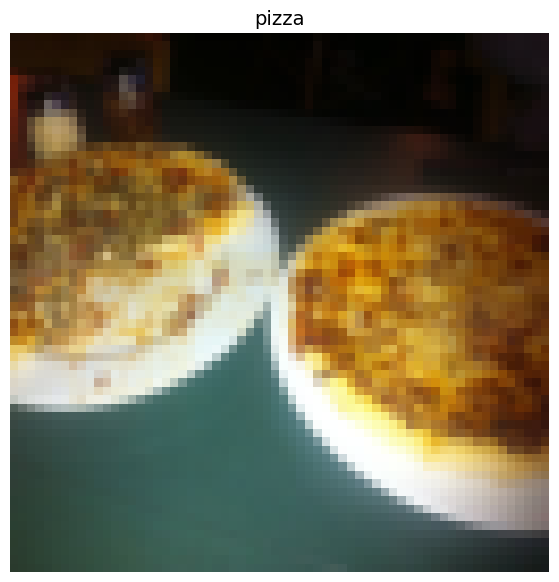

In [18]:
# Rearragne the order dimensions
img_permute = img.permute(1,2,0)

# Print out different shapes
print(f'Original shape: {img.shape} -> [color_channel, height, width]')
print(f'Image permute: {img_permute.shape} -> [height, width, color_channel]')

# plot image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14)

### 6.3. Turn loaded images into 'dataloader'

In [19]:
import os
os.cpu_count()

16

In [20]:
# turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count())
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1f74543ce90>,
 <torch.utils.data.dataloader.DataLoader at 0x1f7453f6fd0>)

In [21]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [22]:
len(train_data), len(test_data)

(225, 75)

In [23]:
225/32

7.03125

In [24]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size whatever u want
print(f'image shape: {img.shape} -> [batch_size, color_channel, height,width]')
print(f'label shape: {label.shape}')

image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channel, height,width]
label shape: torch.Size([1])


### 6.4. Loading Image data with a custom 'Dataset'
1. be able to load images from file
2. be able to get class name from the dataset
3. be able to get classes as dictionary fro the Dataset

Pros:
* create a 'Dataset' out of almost anything
* Not limited to pyTorch pre-built 'Dataset' function

Cons:
* Not make sure to work with 'Dataset'
* more code, can be increasing errors

In [25]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [26]:
# instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a helper function
1. Get the class names using '**os.scandir()**' to traverse a target directory
2. Raise an error if the class names aren't found
3. Turn the class names into a dict and a list and return them

In [27]:
# Setup path for target directory
target_directory = train_dir
print(f'Target_dir: {target_directory}')

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target_dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [28]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [29]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str, int]]:
    '''Finds the classes folder names in a target directory.'''
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    # 2. Raise an error if class names could not be found
    if not classes:
         raise FileNotFoundError(f'Couldn\'\t find any classes in {directory}...please check')
    # 3. Create a directory of index labels
    classes_to_idx = {class_name: i for i, class_name in enumerate(classes)}    
    return classes, classes_to_idx

In [30]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a custom 'Dataset' to replicate 'ImageFolder'
1. subclass 'torch.utils.data.Dataset'
2. Init subclass with a target directory
3. Create several attributes:
    * paths = paths of our images
    * transform - resize or customzing
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function `load_images()`, this function will open an image
5. Overwrite the `__len__()` method to return the length
6. Overwrite the `__getitem__()` method to a given sample when passed an index

In [31]:
# 0. Write custom dataset class
from torch.utils.data import Dataset

# 1. subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    #2. initizlize our custom dataset
    def __init__(self,
                 targ_dir: str,
                 transform=None):
        # 3. Create class attributes
        # get all of the iamge paths
        self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
        # setup transform
        self.transform = transform
        # create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)
    
    # 4. Create a functio to load images
    def load_image(self, index: int) -> Image.Image:
        'Opens an image via a path and returns it'
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self) -> int:
        'Returns the total number of samples.'
        return len(self.paths)
        
    # 6. Overwrite __getitem__() method to return a particular sample
    def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
        'Returns one sample of data, data and label (X,y).'
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]
        
        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label(x,y)
        else:
            return img, class_idx # return untransformed image and label

In [32]:
# Create a transform
train_transforms = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.ToTensor()
                                        ])
test_transforms = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.ToTensor()
                                        ])

In [33]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                      transform=test_transforms)

In [34]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1f7453a7090>,
 <__main__.ImageFolderCustom at 0x1f7454b0d10>)

In [35]:
len(train_data), len(train_data_custom)

(225, 225)

In [36]:
len(test_data), len(test_data_custom)

(75, 75)

In [37]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [38]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### Creating a function to display random image

In [39]:
# 1. Create a functio to take in a dataset
def display_random_image(dataset: torch.utils.data.Dataset,
                         classes: List[str] = None,
                         n: int = 10,
                         display_shape: bool =True,
                         seed: int = None):
    # 2. Adjust display if n is too high
    if n>10:
        n = 10
        display_shape = False
        print(f'For display, purposes, n shouldn\'\t be larger than 10')
        
    # 3. Set the seed
    if seed:
        random.seed(seed)
    
    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    
    # 5. setup plot
    plt.figure(figsize=(16,8))
    
    # 6. loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0],dataset[targ_sample][1]
        
        # 7. Adjust tensor dimensions for plotting
        targ_image_adjust = targ_image.permute(1,2,0) # [color, height, width] -> [height, width, color]
        
        # plot adjust samples
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis('off')
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)
    

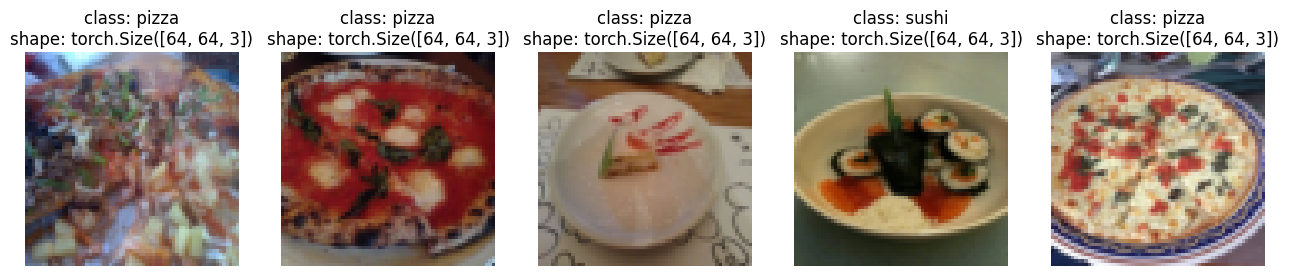

In [40]:
display_random_image(train_data,
                     n=5, 
                     classes=class_names,
                     seed=None)

For display, purposes, n shouldn'	 be larger than 10


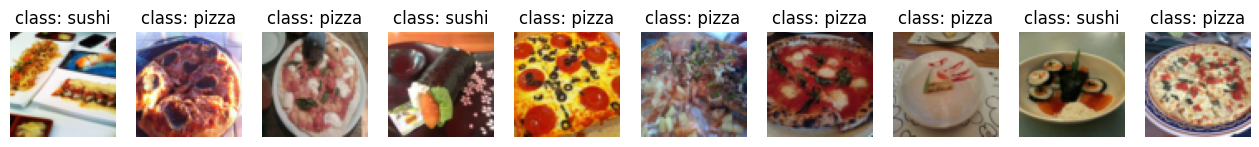

In [41]:
display_random_image(train_data_custom,
                     n=20, 
                     classes=class_names,
                     seed=42)

### Turn custom loaded images into DataLoader's

In [42]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS= os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=BATCH_SIZE, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=BATCH_SIZE, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1f745424cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x1f74524fb10>)

In [43]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


### 6.5 Data augmentation
* it is a definition for the proces of artificially adding diversity to ur training data
    1. Rotate
    2. Shift
    3. Zoom

In [44]:
# Using TrivialAugmentWide()
from torchvision import transforms
from vine import transform

train_transforms = transforms.Compose([
                                        transforms.Resize(size=(224,224)),
                                        transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                        transforms.ToTensor()
])
test_transforms = transforms.Compose([
                                        transforms.Resize(size=(224,224)),
                                        transforms.ToTensor()
])

In [45]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [46]:
# Get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

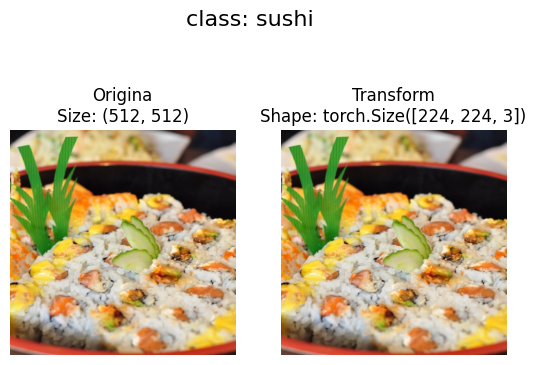

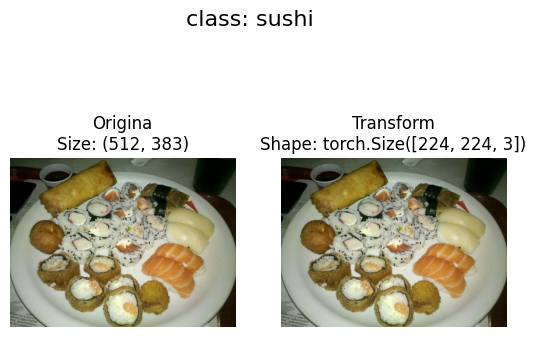

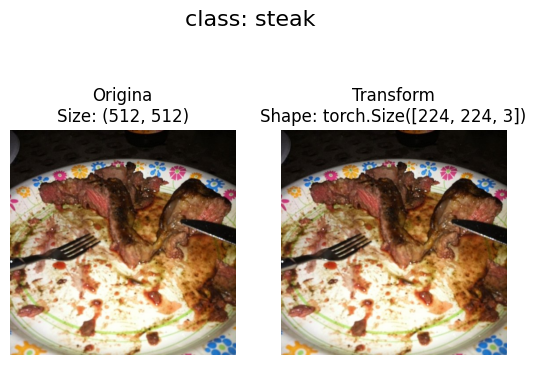

In [47]:
# Plot random transform
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

### 6.5. Model : TinyVGG without data augmentation  

In [48]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [49]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transform)

# 2. Turn the datasets into Dataloader
import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

# Create DataLoader'set
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS
                                     )
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS
                                     )

In [50]:
# TinyVGG model class
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    def forward(self, x:torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fushion

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = TinyVGG(input_shape=3,    # number of color channels in our iamge data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

####  Try forward pass on a single image

In [52]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [53]:
# try a forward pass
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0351],
        [0.0658, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0690, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0401],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0600, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

In [54]:
image_batch.shape

torch.Size([32, 3, 64, 64])

In [55]:
from torchinfo import summary
summary(model_0, input_size=(BATCH_SIZE,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

### 6.4 Create train and test loops function
* train_step - takes in a model and dataloader and trains it
* test_step - takes in a model and evaluate it on the dataloader

In [56]:
# Create train_step
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device: torch.device = device):
    # Put the model in train mode
    model.train()
    
    # Setup train loss and accuracy value
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to the tagret device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward
        y_pred = model(X)
        
        # 2. Calculate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        
        # 3. optimzer zero grad
        optimizer.zero_grad()
        
        # 4. loss backward()
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # 6.Calculate the accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        
    # Adust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc    

In [57]:
# Create test_step
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device: torch.device = device):
    # Put the model in test mode
    model.eval()
        
    # Setup test loss and accuracy value
    test_loss, test_acc = 0,0
    
    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            # Send data to the tagret device
            X, y = X.to(device), y.to(device)        
            # 1. Forward
            y_pred_logits = model(X)
            
            # 2. Calculate loss
            loss = loss_fn(y_pred_logits,y)
            test_loss += loss.item()
            
            # 3.Calculate the accuracy
            test_pred_labels = torch.argmax(torch.softmax(y_pred_logits,dim=1), dim=1)
            test_acc += (test_pred_labels==y).sum().item()/len(test_pred_labels)
        
    # Adust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc    

In [58]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: torch.device = device):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
                                    
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

c:\ProgramData\anaconda3\envs\ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Train and evaluate model

In [59]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, 
                  hidden_units=10,
                  output_shape=len(train_data)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:27<01:51, 27.86s/it]

Epoch: 1 | train_loss: 4.3320 | train_acc: 0.3789 | test_loss: 2.3686 | test_acc: 0.2604


 40%|████      | 2/5 [00:55<01:22, 27.45s/it]

Epoch: 2 | train_loss: 1.3981 | train_acc: 0.4219 | test_loss: 1.2109 | test_acc: 0.1979


 60%|██████    | 3/5 [01:21<00:53, 26.87s/it]

Epoch: 3 | train_loss: 1.1726 | train_acc: 0.2812 | test_loss: 1.1367 | test_acc: 0.2812


<span style='color:skyblue;font-weight:bold'> IMPROVING A MODEL PERFORMANCE </span>
1. <span style='color:orange;font-weight:bold'> Add more layers </span> - Each layer potentially increases the leanring capabilities of the model with each layer.
2. <span style='color:orange;font-weight:bold'> Add more hidden units </span> - Increasing a potential learning capabilities of the model like 'add more layers'.
3. <span style='color:orange;font-weight:bold'> Fitting for longer (more epochs) </span> - learning more
4. <span style='color:orange;font-weight:bold'> Changing the activation functions </span> - linear algorithm cannot cover everything. so it is necessary to use the non-linear algorithm or else.
5. <span style='color:orange;font-weight:bold'> Change the learning rate </span> - stabilize the learning the parameters each step
6. <span style='color:orange;font-weight:bold'> Change the loss function </span> - less model speific important
7. <span style='color:orange;font-weight:bold'> Use transfer learning </span> - take a pretrained model from a problem domain

### 6.5 Plot the loss curves of model 0

In [ ]:
# get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    '''Plots training curves of a results dictionary'''
    # get the loss values of the results dictionary(training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']
    
    # Get the accuracy
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    
    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))
    
    # setup  a plot
    plt.figure(figsize=(15,7))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

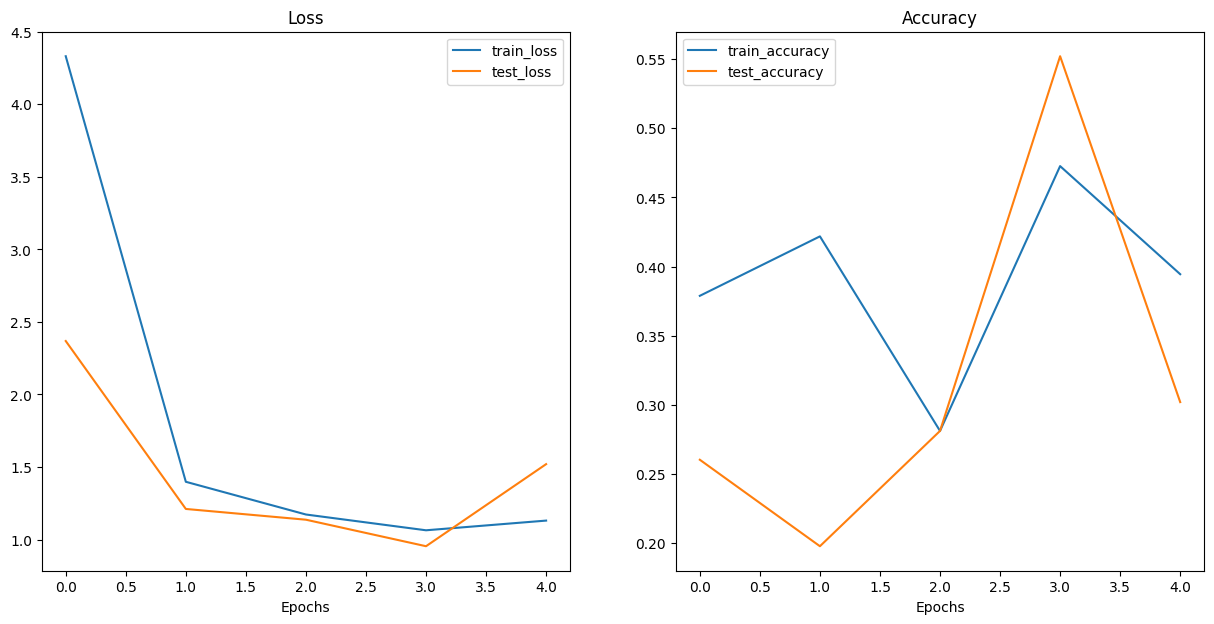

In [ ]:
plot_loss_curves(model_0_results)

<span style='color:red;font-weight:bold'> REDUCING OVERFITTING </span>

1. <span style='color:orange;font-weight:bold'> Get more data </span> - give more chance to learn
2. <span style='color:orange;font-weight:bold'> Data augmentation </span> - increase diversity patterns
3. <span style='color:orange;font-weight:bold'> Better data </span> - removing poor samples or adding better sampels to improve a model
4. <span style='color:orange;font-weight:bold'> Use transfer learning </span> - take a mode's pre-learned patterns from one problem domain
5. <span style='color:orange;font-weight:bold'> Simplify model </span> - stabilize the model performance by too complicated model architecture
6. <span style='color:orange;font-weight:bold'> learning reate decay </span> - slowly decrease the learning rate as a model train for the closer convergence
7. <span style='color:orange;font-weight:bold'> early stopping </span> - stop before it begins to overfit

ps. Reducing **Underfitting**
1. Add more layers/units to ur model
2. tweak the learning rate
3. train for longer
4. Transfer learning
5. use less regularization

### Model 1: TinyVGG with Data augmentation

In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_trainsform_trivial = transforms.Compose([
                                                transforms.Resize(size=(64,64)),
                                                transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                                transforms.ToTensor()                                                
])
test_trainsform_trivial = transforms.Compose([
                                                transforms.Resize(size=(64,64)),
                                                transforms.ToTensor()                                                
])

In [ ]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_trainsform_trivial)
test_data_augmented = datasets.ImageFolder(root=test_dir,
                                            transform=test_trainsform_trivial)

In [ ]:
train_dir

WindowsPath('data/pizza_steak_sushi/train')

In [ ]:
train_data_augmented

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )

In [ ]:
# Turn datasets into Dataloaders
import os
import torch
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_augmented = DataLoader(dataset=test_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

### construct and train Model 1

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1 
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_augmented,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:15<01:02, 15.52s/it]

Epoch: 1 | train_loss: 1.1074 | train_acc: 0.2500 | test_loss: 1.1043 | test_acc: 0.2604


 40%|████      | 2/5 [00:30<00:46, 15.45s/it]

Epoch: 2 | train_loss: 1.0786 | train_acc: 0.4258 | test_loss: 1.1140 | test_acc: 0.3400


 60%|██████    | 3/5 [00:47<00:32, 16.06s/it]

Epoch: 3 | train_loss: 1.1368 | train_acc: 0.3047 | test_loss: 1.1082 | test_acc: 0.3598


 80%|████████  | 4/5 [01:04<00:16, 16.47s/it]

Epoch: 4 | train_loss: 1.0885 | train_acc: 0.4258 | test_loss: 1.0917 | test_acc: 0.3598


100%|██████████| 5/5 [01:23<00:00, 16.71s/it]

Epoch: 5 | train_loss: 1.1116 | train_acc: 0.3047 | test_loss: 1.0950 | test_acc: 0.3400
Total training time: 83.551 seconds


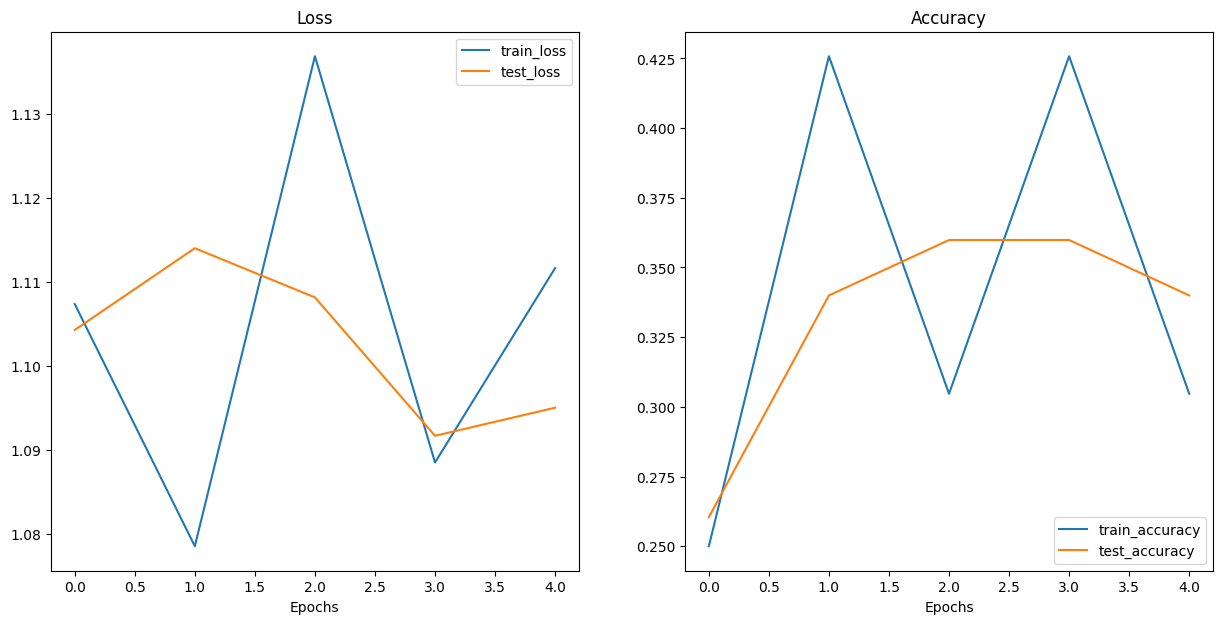

In [ ]:
plot_loss_curves(model_1_results)

### 6.6 Comparing the model

1. Hard coding
2. PyTorch + Tensorboard
3. weight and bias : experiments -> hyperparameters `import wandb`
4. MLFlow

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,4.331977,0.378906,2.368576,0.260417
1,1.398141,0.421875,1.210867,0.197917
2,1.172568,0.281250,1.136720,0.281250
3,1.063793,0.472656,0.953915,0.552083
4,1.130587,0.394531,1.519788,0.302083


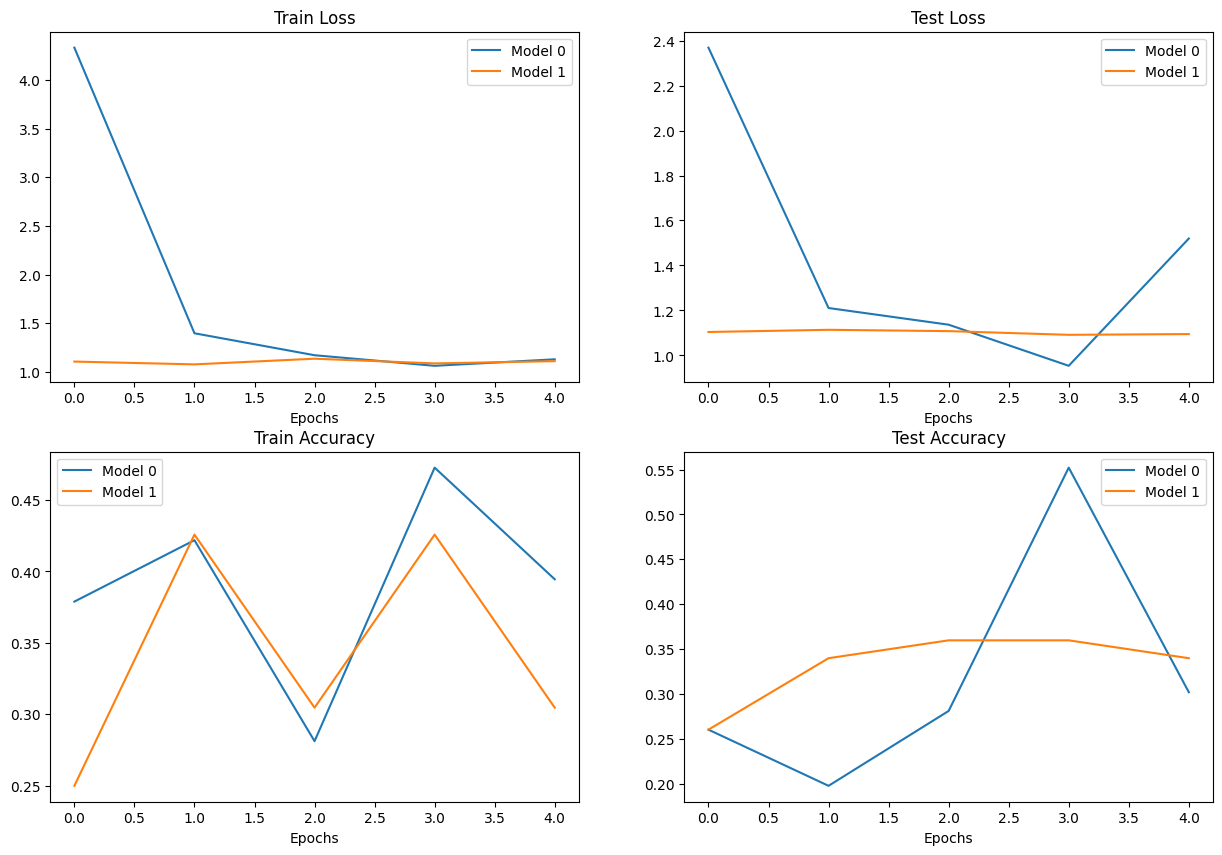

In [ ]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

### 6.7 Predicting a random image

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

### Loading in a custom image 
Need to check a following list
1. In tensor form with datatype (torch.float32)
2. of shape 64 x 64 x 3 `[HWC]`
3. On the right device


In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

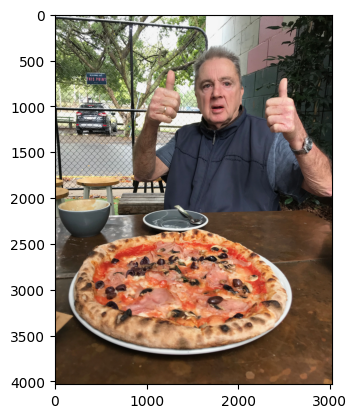

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0));

In [ ]:
# Try to make a prediction on image in uint8 format (this will error)
# model_1.eval()
# with torch.inference_mode():
#     model_1(custom_image_uint8.to(device))

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image[:5]

tensor([[[154., 173., 181.,  ...,  21.,  18.,  14.],
         [146., 165., 181.,  ...,  21.,  18.,  15.],
         [124., 146., 172.,  ...,  18.,  17.,  15.],
         ...,
         [ 72.,  59.,  45.,  ..., 152., 150., 148.],
         [ 64.,  55.,  41.,  ..., 150., 147., 144.],
         [ 64.,  60.,  46.,  ..., 149., 146., 143.]],

        [[171., 190., 193.,  ...,  22.,  19.,  15.],
         [163., 182., 193.,  ...,  22.,  19.,  16.],
         [141., 163., 184.,  ...,  19.,  18.,  16.],
         ...,
         [ 55.,  42.,  28.,  ..., 107., 104., 103.],
         [ 47.,  38.,  24.,  ..., 108., 104., 102.],
         [ 47.,  43.,  29.,  ..., 107., 104., 101.]],

        [[119., 138., 147.,  ...,  17.,  14.,  10.],
         [111., 130., 145.,  ...,  17.,  14.,  11.],
         [ 87., 111., 136.,  ...,  14.,  13.,  11.],
         ...,
         [ 35.,  22.,   8.,  ...,  52.,  52.,  48.],
         [ 27.,  18.,   4.,  ...,  50.,  49.,  44.],
         [ 27.,  23.,   9.,  ...,  49.,  46.,  43.]]]

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1] (ps. image pixel number 0 ~ 255)
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image[:5]}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

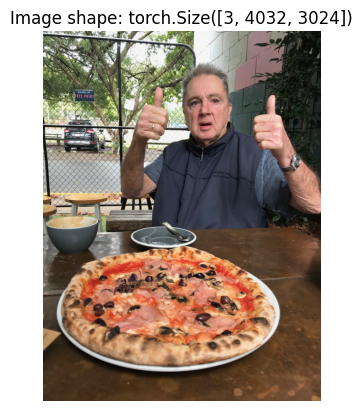

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)), #
    # transforms.Resize((244, 244)), # much better
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


c:\ProgramData\anaconda3\envs\ai\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

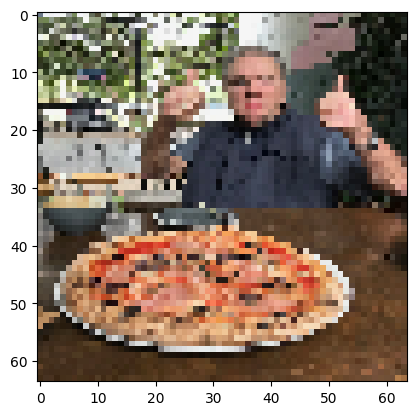

In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

1. ***Wrong datatypes*** - our model expects torch.float32 where our original custom image was uint8.  
2. ***Wrong device*** - our model was on the target device (in our case, the GPU) whereas our target data hadn't been moved to the target device yet.  
3. ***Wrong shapes*** - our model expected an input image of shape [N, C, H, W] or [batch_size, color_channels, height, width] whereas our custom image tensor was of shape [color_channels, height, width].  

In [ ]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

tensor([[ 0.0979, -0.0800, -0.0232]], device='cuda:0')

In [ ]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3673, 0.3074, 0.3254]], device='cuda:0')

In [ ]:
# Convert prediction probabilities -> prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_labels

tensor([0])

In [ ]:
class_names[custom_image_pred_labels]

'pizza'

In [ ]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
   
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)  
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        '''
        target_iamge.shape = torch.Size([3, 64, 64])
        target_image.unsqueeze(dim=0).shape = torch.Size([1, 3, 64, 64])
        '''
        target_image = target_image.unsqueeze(dim=0) 
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

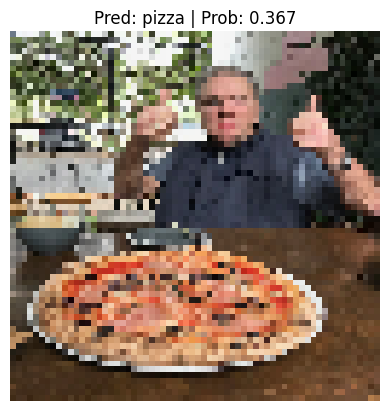

In [ ]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)